# Project: Obesity and Pharmaceutical drug use

## Team 8

Nickel Carsten (h11825522)  
Bauer Albert Leo (h11705438)  
Filip Kostoláni (h11814591)

Role distribution:
..

## Scenario

Scenario

### Data Sources (as commented python code, links and methods)
For our project we are using 2 different datasets which we believe to be able to extract interesting information by combining those two. 


In [1]:
#Dataset 1: https://databank.worldbank.org/reports.aspx?source=311&series=SH.STA.OWAD.ZS
#Dataset 2: https://datahub.io/core/pharmaceutical-#drug-spending

In [2]:
# Wo die daten her, welche source, links und methoden zum runterladen und sichern der daten

## Data Inspection

In [3]:
#Load all necessary libaries
import os
import json
import csv
import pandas as pd 
import numpy as np

#import statsmodels.formula.api as sm
import statsmodels.api as sm 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

### Dataset 1

In [5]:
#before we start we have to get the filePath to the first file
filePath='./data/data_notebook-1_bmi.csv'
#As we can see on the file extension, we are dealing with a file containing comma seperated values.

#before we load the data into the dataframe, we want to get an overview on how big the file is
fSize = os.path.getsize(filePath)
print('File size of '+filePath+' is: '+str(fSize/1024) + ' KBytes')

File size of ./data/data_notebook-1_bmi.csv is: 52.8642578125 KBytes


In [6]:
#Next, we load the data into a dataframe using pandas
df1 = pd.read_csv(filePath)

In [7]:
#We start with using .head() to get an overview on what data we are working with.
df1.head(n = 3)

#Based on the first column 'Series Name', it can be observed that the values for the different years are the share of adults being overweight.
#Country Name shows to which country the observed values belong, while Country code is the international abbreviation for the countries.
#Each of the remaining columns refer to a specific year, showing that we are dealing with time series data from 1980 to 2019.

,Series Name,Series Code,Country Name,Country Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,Afghanistan,AFG,7.3,7.6,7.9,8.2,8.4,8.7,...,19.3,19.9,20.5,21.1,21.7,22.3,23,..,..,..
1,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,Albania,ALB,35.6,36.1,36.5,37,37.5,38,...,53.3,54,54.8,55.5,56.3,57,57.7,..,..,..
2,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,Algeria,DZA,33.3,34,34.8,35.6,36.4,37.2,...,57.4,58.2,59,59.8,60.5,61.3,62,..,..,..


In [8]:
#Chunk und der darunter nicht unbedingt notwendig, quasi wiederholung vom vorherigen

#Next we want to have a look at the columns of the dataset to get an overview on what data we are working with
df1.columns

#Based on the column names we can see that the data we are dealing with time series data from the years of 1980 to 2019.

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]'],
      dtype='object')

#eigentlich nur wiederholung, am besten rausnehmen

the first column refers to observed variable, the Prevalence of overweight in %. The Series Code refers to the database where the data has been from. The Country Name and the Country code refer to the different countries where observations have been made. The rest of the columns refering to the observed prevalence of overweight for each year grouped by the countries. 

In [9]:
#check the datatypes
df1.dtypes

#The different variables are all stored as object. In order to work with the the
#qualitative variables we have to adjust the datatypes later on.  

Series Name      object
Series Code      object
Country Name     object
Country Code     object
1980 [YR1980]    object
1981 [YR1981]    object
1982 [YR1982]    object
1983 [YR1983]    object
1984 [YR1984]    object
1985 [YR1985]    object
1986 [YR1986]    object
1987 [YR1987]    object
1988 [YR1988]    object
1989 [YR1989]    object
1990 [YR1990]    object
1991 [YR1991]    object
1992 [YR1992]    object
1993 [YR1993]    object
1994 [YR1994]    object
1995 [YR1995]    object
1996 [YR1996]    object
1997 [YR1997]    object
1998 [YR1998]    object
1999 [YR1999]    object
2000 [YR2000]    object
2001 [YR2001]    object
2002 [YR2002]    object
2003 [YR2003]    object
2004 [YR2004]    object
2005 [YR2005]    object
2006 [YR2006]    object
2007 [YR2007]    object
2008 [YR2008]    object
2009 [YR2009]    object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
2016 [YR2016]    object
2017 [YR2017]   

In [10]:
#get the shape of the data
df1.shape

(217, 44)

As we can see we our dataframe has 217 rows and 44 columns. We have values for the prevalance of overweight from 217 "countries" for the period of 40 years. After tidying the data, that should leave us with 8680 observations.

In [11]:
#checking missing values

#In order to check for missing values we need to preempt one of the data cleansing steps, since missing values are displayed as '..' in that dataset.

#Therefore, we iterate of each column and replace '..' to NaN
for i in df1:
    df1[i].replace('..', np.nan, inplace= True)

df1.isna().sum()
#We can observe that there are no values for any of the 217 listed countries in the last 3 years.
#Also, we see that a constant number of countries (29 nations) do not have any values at all.
#Since the numbers of missing values are constant over the years, we can conclude that we have no missing data for the remaining 188 countries.
#Therefore, we can exclude and drop those countries as well as the last 3 years in the cleansing step.

Series Name        0
Series Code        0
Country Name       0
Country Code       0
1980 [YR1980]     29
1981 [YR1981]     29
1982 [YR1982]     29
1983 [YR1983]     29
1984 [YR1984]     29
1985 [YR1985]     29
1986 [YR1986]     29
1987 [YR1987]     29
1988 [YR1988]     29
1989 [YR1989]     29
1990 [YR1990]     29
1991 [YR1991]     29
1992 [YR1992]     29
1993 [YR1993]     29
1994 [YR1994]     29
1995 [YR1995]     29
1996 [YR1996]     29
1997 [YR1997]     29
1998 [YR1998]     29
1999 [YR1999]     29
2000 [YR2000]     29
2001 [YR2001]     29
2002 [YR2002]     29
2003 [YR2003]     29
2004 [YR2004]     29
2005 [YR2005]     29
2006 [YR2006]     29
2007 [YR2007]     29
2008 [YR2008]     29
2009 [YR2009]     29
2010 [YR2010]     29
2011 [YR2011]     29
2012 [YR2012]     29
2013 [YR2013]     29
2014 [YR2014]     29
2015 [YR2015]     29
2016 [YR2016]     29
2017 [YR2017]    217
2018 [YR2018]    217
2019 [YR2019]    217
dtype: int64

In [12]:
#Vllt reinbringen für Bezug für Homework, aber eher nicht

#Checking for duplicates
#In order to check for duplicates, we introduce a function duplicates which return a list of theindex for each row that contains duplicates  
def duplicates(df):
    duplicates_values = []
    df_duplicate = df[df.duplicated()]
    for index, row in df_duplicate.iterrows():
            duplicates_values.append(index)
    return duplicates_values

duplicates(df1)

[]

In [13]:
#Checking for duplicates
df1[df1.duplicated()].shape 

#The shape of a dataframe containing all duplicates has 0 rows, showing that the dataset1 does not contain any duplicated data.

(0, 44)

##### Steps to do for cleaning Dataset1:  
In the first step we can exclude the 29 countries without any observation as well as drop years from 2017-2019 since there is no data for those years. Also, we can drop the Series Name and the Series code, since those does not matter for our further analysis. Next up, we melt the dataframe to bring it into normal form. In the last step, we need to fix the datatypes of the numerical values in order to work with them later on the analysis. 

### Dataset 2

In [14]:
#We do the same for the second dataset:
filePath = './data/data_notebook-1_druguse.json'
#As we can see on the file extension, we are dealing with a json file

#before we load the data into the dataframe, we want to get an overview on how big the file is
fSize = os.path.getsize(filePath)
print('File size of '+filePath+' is: '+str(fSize/1024) + ' KBytes')

File size of ./data/data_notebook-1_druguse.json is: 199.2998046875 KBytes


In [15]:
#Next, we load the data into a second dataframe
df2 = pd.read_json(filePath)

In [16]:
#As we did for dataset 1, we are getting an overview on the data by using .head()
df2.head(n = 10)

#As we can see, out dataset includes data on the pharmaceutical spendings.
#The Location represents the country code, the PC_GDP shows the percentage of the GDP which get spent on pharmaceutical drugs.
#The PC_HEALTH shows the share of spendings on pharmeutical drugs among all health expenditures.
#TIME refers to the year of the observation. Total_SPEND refers to the total expenditure on pharmaceutical drugs in millions
#and USD_CAP shows the spendings on pharmaceutical drugs per capita.

,FLAG_CODES,LOCATION,PC_GDP,PC_HEALTHXP,TIME,TOTAL_SPEND,USD_CAP
0,None,AUS,0.727,15.992,1971,462.11,35.720
1,None,AUS,0.686,15.091,1972,475.11,36.056
2,None,AUS,0.681,15.117,1973,533.47,39.871
3,None,AUS,0.755,14.771,1974,652.65,47.559
4,None,AUS,0.682,11.849,1975,660.76,47.561
5,None,AUS,0.630,10.920,1976,658.26,46.908
6,None,AUS,0.613,10.087,1977,676.23,47.649
7,None,AUS,0.591,9.958,1978,729.37,50.799
8,None,AUS,0.523,8.981,1979,722.30,49.766
9,None,AUS,0.540,9.263,1980,837.03,56.972


In [17]:
#Check the datatypes
df2.dtypes

#the variables of the dataset are stored in the their appropiate data type and therefore do not need any cleaning.

FLAG_CODES      object
LOCATION        object
PC_GDP         float64
PC_HEALTHXP    float64
TIME             int64
TOTAL_SPEND    float64
USD_CAP        float64
dtype: object

In [18]:
df2.shape

#The dataset contains 1036 observations on 7 variables including qualitative variables like the location
#as well as quantitative variables like PC_GDP and the PC_HEAHTLEXP.
#Therefore, it fits all the requirements.

(1036, 7)

In [19]:
#check for missing values
df2.isna().sum()

#We can see that besides the flag_codes columns, there are no missing values in our dataset. 

FLAG_CODES     973
LOCATION         0
PC_GDP           0
PC_HEALTHXP      0
TIME             0
TOTAL_SPEND      0
USD_CAP          0
dtype: int64

In [20]:
#Checking for duplicates
df2[df2.duplicated()].shape 

#Similar to dataset1, the shape of the dataframe containing all duplicates has also 0 rows, so we do not have any duplicates in dataset2.

(0, 7)

In [21]:
#Since we want to join the two datasets on countries later on, we inspect on how many countries the dataset has observations from
len(df2['LOCATION'].value_counts())

#We see that there are observations for 36 different countries.
#That is rather unfortunate since it leaves us with only 36 countries to work with.

36

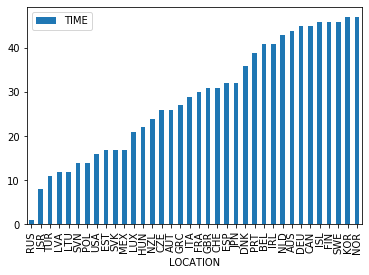

In [22]:
#Next, we want to check how the distribution of observations among the dataset is 
df2['LOCATION'].value_counts()
df2.groupby(['LOCATION'], as_index=False).agg({'TIME': "count"}).sort_values('TIME').plot.bar(y='TIME',x='LOCATION')

#The distribution among the observations per countries is rather disseminated.
#While most of the countries have at least 10 observations,
#there are some countries with only 8 observations like Israel or Russia which only has a single observation.

In [23]:
#only for test purpose 



#testdf2 = df2

#testdf2['LOCATION']
#testdf2.groupby('LOCATION').count()

#testdf2
#testdf2.groupby("LOCATION")["LOCATION"].count()

##### Steps to do for cleaning Dataset2:  
Based on the data inspection we can conclude that the second dataset does not need a lot of cleaning anymore, it is already in normal form as well as not having any missing values. Also the variables are all stored in the appropiate data format.
Nevertheless there are some small changes we need to adjust. First, we will rename some of the column names in order to make it easier to understand them. Second, we will drop the Flag_Codes columns since it is not relevant for our analysis. Third, we will will rearrange the columns and diplay the percentages as decimal values. Lastly, we exclude countries with less than 10 observations.

## Data Cleansing 

### Dataset 1

As we mentioned before, the steps we do to clean dataset 1 are:
1. Drop irrelevant columns (Series Name, Series Code, Year 2017 - 2019)
2. Drop countries without observations
3. Bring data into normal form
5. Fix datatypes

In [24]:
#Step 1: remove irrelevant columns
df1.head(n =5)
#by looking at the dataset we can see that Series Name as well as the Series Code will not be useful for our further analysis
#so we can exclude them. Also, since we do not have data from the year 2017-2019, we excludes those years as well.

,Series Name,Series Code,Country Name,Country Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,Afghanistan,AFG,7.3,7.6,7.9,8.2,8.4,8.7,...,19.3,19.9,20.5,21.1,21.7,22.3,23,NaN,NaN,NaN
1,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,Albania,ALB,35.6,36.1,36.5,37,37.5,38,...,53.3,54,54.8,55.5,56.3,57,57.7,NaN,NaN,NaN
2,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,Algeria,DZA,33.3,34,34.8,35.6,36.4,37.2,...,57.4,58.2,59,59.8,60.5,61.3,62,NaN,NaN,NaN
3,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Prevalence of overweight (% of adults),SH.STA.OWAD.ZS,Andorra,AND,50.4,51.1,51.9,52.6,53.2,53.9,...,62.5,62.7,62.9,63.1,63.3,63.5,63.7,NaN,NaN,NaN


In [25]:
#drop irrelevant and empty columns
df1 = df1.iloc[:,2:-3]
df1.head(n = 5)

,Country Name,Country Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Afghanistan,AFG,7.3,7.6,7.9,8.2,8.4,8.7,9.1,9.4,...,17.7,18.2,18.8,19.3,19.9,20.5,21.1,21.7,22.3,23
1,Albania,ALB,35.6,36.1,36.5,37,37.5,38,38.5,39,...,51,51.8,52.5,53.3,54,54.8,55.5,56.3,57,57.7
2,Algeria,DZA,33.3,34,34.8,35.6,36.4,37.2,38,38.9,...,55,55.8,56.6,57.4,58.2,59,59.8,60.5,61.3,62
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,50.4,51.1,51.9,52.6,53.2,53.9,54.5,55,...,61.8,62,62.2,62.5,62.7,62.9,63.1,63.3,63.5,63.7


In [26]:
#Step 2: drop countries without observations
df1 = df1.dropna()
df1.head(n = 5)

,Country Name,Country Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Afghanistan,AFG,7.3,7.6,7.9,8.2,8.4,8.7,9.1,9.4,...,17.7,18.2,18.8,19.3,19.9,20.5,21.1,21.7,22.3,23
1,Albania,ALB,35.6,36.1,36.5,37,37.5,38,38.5,39,...,51,51.8,52.5,53.3,54,54.8,55.5,56.3,57,57.7
2,Algeria,DZA,33.3,34,34.8,35.6,36.4,37.2,38,38.9,...,55,55.8,56.6,57.4,58.2,59,59.8,60.5,61.3,62
4,Andorra,AND,50.4,51.1,51.9,52.6,53.2,53.9,54.5,55,...,61.8,62,62.2,62.5,62.7,62.9,63.1,63.3,63.5,63.7
5,Angola,AGO,9.6,9.9,10.2,10.6,10.9,11.2,11.6,12,...,21.7,22.3,22.9,23.6,24.2,24.8,25.5,26.2,26.8,27.5


In [27]:
#Step 2: Bring data into normal form

#Before we melt the data we are renaming and removing the space of Country Name and Country Code
#in order to have the same naming convention as in the other dataset.
df1.rename(columns={'Country Name':'Country_Name',
                          'Country Code':'Country_Code'}, inplace = True)

In [28]:
#Then we melt the data
df1 = pd.melt(df1,['Country_Name','Country_Code'],
              var_name='Year', value_name='Obesity')
#Then we sort it by Country name and Year
df1 = df1.sort_values(by=['Country_Name', 'Year'])
df1.head(10)

,Country_Name,Country_Code,Year,Obesity
0,Afghanistan,AFG,1980 [YR1980],7.3
188,Afghanistan,AFG,1981 [YR1981],7.6
376,Afghanistan,AFG,1982 [YR1982],7.9
564,Afghanistan,AFG,1983 [YR1983],8.2
752,Afghanistan,AFG,1984 [YR1984],8.4
940,Afghanistan,AFG,1985 [YR1985],8.7
1128,Afghanistan,AFG,1986 [YR1986],9.1
1316,Afghanistan,AFG,1987 [YR1987],9.4
1504,Afghanistan,AFG,1988 [YR1988],9.7
1692,Afghanistan,AFG,1989 [YR1989],10


In [29]:
#Next, we format the column 'Year'
df1['Year'] = df1['Year'].map(lambda x: x[:4])
df1.head( n = 10)

,Country_Name,Country_Code,Year,Obesity
0,Afghanistan,AFG,1980,7.3
188,Afghanistan,AFG,1981,7.6
376,Afghanistan,AFG,1982,7.9
564,Afghanistan,AFG,1983,8.2
752,Afghanistan,AFG,1984,8.4
940,Afghanistan,AFG,1985,8.7
1128,Afghanistan,AFG,1986,9.1
1316,Afghanistan,AFG,1987,9.4
1504,Afghanistan,AFG,1988,9.7
1692,Afghanistan,AFG,1989,10


In [30]:
#Next up, we reset the index and drop the old one
df1 = df1.reset_index(drop = True) 
df1.head(10)

,Country_Name,Country_Code,Year,Obesity
0,Afghanistan,AFG,1980,7.3
1,Afghanistan,AFG,1981,7.6
2,Afghanistan,AFG,1982,7.9
3,Afghanistan,AFG,1983,8.2
4,Afghanistan,AFG,1984,8.4
5,Afghanistan,AFG,1985,8.7
6,Afghanistan,AFG,1986,9.1
7,Afghanistan,AFG,1987,9.4
8,Afghanistan,AFG,1988,9.7
9,Afghanistan,AFG,1989,10


In [31]:
#Fix the datatypes to be able to work with the quantitative data
df1[['Year', 'Obesity']] = df1[['Year', 'Obesity']].apply(pd.to_numeric)
df1.dtypes

Country_Name     object
Country_Code     object
Year              int64
Obesity         float64
dtype: object

In [32]:
#Display Obesity as decimal value to have a consistency when it comes to displaying percentages
df1['Obesity'] = df1['Obesity'] / 100

In [33]:
#tidy dataset1
df1

#The tidy dataset 1 has 6956 observations on 4 variables. While Country_Name as well as Country_Code
#function as a country identifer, the other two columns show the percentage of people who suffer from
#obesity for each country in each year.

,Country_Name,Country_Code,Year,Obesity
0,Afghanistan,AFG,1980,0.073
1,Afghanistan,AFG,1981,0.076
2,Afghanistan,AFG,1982,0.079
3,Afghanistan,AFG,1983,0.082
4,Afghanistan,AFG,1984,0.084
...,...,...,...,...
6951,Zimbabwe,ZWE,2012,0.366
6952,Zimbabwe,ZWE,2013,0.370
6953,Zimbabwe,ZWE,2014,0.373
6954,Zimbabwe,ZWE,2015,0.377


### Dataset 2

As we mentioned before, the steps we are planning to do for cleaning dataset 2 are:
1. Drop column flag_Codes
2. Rename and rearrange the columns
3. Display percentages as decimal numbers 
4. Drop countries with less than 10 observations

In [34]:
#Step 1: remove irrelevant column ( Flag_Code)
df2 = df2.iloc[:,1:]
df2

,LOCATION,PC_GDP,PC_HEALTHXP,TIME,TOTAL_SPEND,USD_CAP
0,AUS,0.727,15.992,1971,462.11,35.720
1,AUS,0.686,15.091,1972,475.11,36.056
2,AUS,0.681,15.117,1973,533.47,39.871
3,AUS,0.755,14.771,1974,652.65,47.559
4,AUS,0.682,11.849,1975,660.76,47.561
...,...,...,...,...,...,...
1031,LTU,1.820,28.942,2012,1340.70,448.728
1032,LTU,1.728,28.173,2013,1364.02,461.178
1033,LTU,1.724,27.836,2014,1422.92,485.245
1034,LTU,1.745,26.784,2015,1465.30,504.422


In [35]:
#Step 2: Rename and rearrange the columns
df2.rename(columns={'LOCATION':'Country_Code',
                          'PC_GDP':'PD_GDP', 'PC_HEALTHXP':'PD_health', 'TIME':'Year', 'TOTAL_SPEND':'PD_total', 'USD_CAP': 'PD_perCap'}, inplace = True)
df2 = df2[['Country_Code', 'Year', 'PD_perCap', 'PD_total', 'PD_GDP', 'PD_health']]
df2.head(n =5)

,Country_Code,Year,PD_perCap,PD_total,PD_GDP,PD_health
0,AUS,1971,35.720,462.11,0.727,15.992
1,AUS,1972,36.056,475.11,0.686,15.091
2,AUS,1973,39.871,533.47,0.681,15.117
3,AUS,1974,47.559,652.65,0.755,14.771
4,AUS,1975,47.561,660.76,0.682,11.849


In [36]:
#Step 3: Display percentages as decimal numbers 

df2[['PD_GDP', 'PD_health']] = df2[['PD_GDP', 'PD_health']] / 100

df2

,Country_Code,Year,PD_perCap,PD_total,PD_GDP,PD_health
0,AUS,1971,35.720,462.11,0.00727,0.15992
1,AUS,1972,36.056,475.11,0.00686,0.15091
2,AUS,1973,39.871,533.47,0.00681,0.15117
3,AUS,1974,47.559,652.65,0.00755,0.14771
4,AUS,1975,47.561,660.76,0.00682,0.11849
...,...,...,...,...,...,...
1031,LTU,2012,448.728,1340.70,0.01820,0.28942
1032,LTU,2013,461.178,1364.02,0.01728,0.28173
1033,LTU,2014,485.245,1422.92,0.01724,0.27836
1034,LTU,2015,504.422,1465.30,0.01745,0.26784


In [37]:
#Nicht speziell nach Werten filtern, sondern wenn observation < 10!!

#Step 4: drop countries with less than 10 observations
#In order to be able to compare the spending on obesity and pharmeutical drug use, we at least need a few observations per country.
#That being said, we decided to drop observations for countries with less than 10 observations in total.
df2 = df2[(df2['Country_Code'] != 'RUS') & (df2['Country_Code'] != 'ISR')]
df2

,Country_Code,Year,PD_perCap,PD_total,PD_GDP,PD_health
0,AUS,1971,35.720,462.11,0.00727,0.15992
1,AUS,1972,36.056,475.11,0.00686,0.15091
2,AUS,1973,39.871,533.47,0.00681,0.15117
3,AUS,1974,47.559,652.65,0.00755,0.14771
4,AUS,1975,47.561,660.76,0.00682,0.11849
...,...,...,...,...,...,...
1030,LTU,2011,386.589,1170.64,0.01692,0.26038
1031,LTU,2012,448.728,1340.70,0.01820,0.28942
1032,LTU,2013,461.178,1364.02,0.01728,0.28173
1033,LTU,2014,485.245,1422.92,0.01724,0.27836


In [38]:
#Probesachen für die Query für observations more than 10


#value_counts = df2_iloc['Country_Code'].value_counts()
#value_counts

#for column in df2_iloc[['Country_Code']]:
#    columnSeriesObj = df2_iloc[column]
 #   print('Hello')
#list = []
#for i in value_counts:
 #   if value_counts[i]:
  #      list.append[i]

#df2_iloc[df2_iloc[]'Country_Code'].value_counts()


#df2_iloc
#value_count = df2_iloc['Country_Code'].value_counts()

#value_count
#for i in value_count:
 #   if value_count[i] < 10:
  #      print('Hello World')
#over5 = value_count[] > 5
#filter = df2_iloc['Country_Code'].value_counts() > 5
#data = df2_iloc.where(filter)
#data['AUS']

### Merging datasets

In [39]:
#Merging the two datasets together using Country_Code and Year as joining key
df3 = pd.merge(df1, df2, on=['Country_Code', 'Year'])
df3

,Country_Name,Country_Code,Year,Obesity,PD_perCap,PD_total,PD_GDP,PD_health
0,Australia,AUS,1980,0.446,56.972,837.03,0.00540,0.09263
1,Australia,AUS,1981,0.452,65.390,976.08,0.00548,0.09388
2,Australia,AUS,1982,0.457,67.606,1026.12,0.00564,0.09248
3,Australia,AUS,1983,0.463,74.083,1138.58,0.00580,0.09589
4,Australia,AUS,1984,0.469,77.270,1201.08,0.00569,0.09465
...,...,...,...,...,...,...,...,...
902,United States,USA,2011,0.653,965.580,300935.90,0.01939,0.11855
903,United States,USA,2012,0.658,964.237,302768.84,0.01874,0.11459
904,United States,USA,2013,0.664,980.864,310154.00,0.01858,0.11384
905,United States,USA,2014,0.669,1081.402,344495.16,0.01981,0.11968


In [40]:
#number of countries
len(df3['Country_Code'].value_counts())

34

We decided to use the inner join which leaves us with a dataset containing 907 observations on 8 variables. The merged dataset contains the Country Name and its Country Code as qualitative variable, the Year of each observation, the prevalence of adults being obese ('Obesity'), pharmameutical drug spending per Capita ('PD_perCap'), total spending on pharmaceutical drugs ('PD_total'), the share of pharmaceutical drug spending on the countries GDP ('PD_GDP') and the share of pharmaceutical drug spending on the total health spending ('PD_health') as quantitative variables. We have data for 34 countries with each having at least 10 observations.

## Queries and Data Processing 

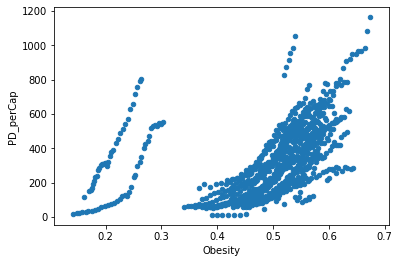

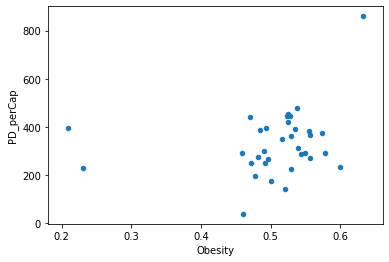

In [41]:
x1 = df3.plot.scatter(x = 'Obesity', y = 'PD_perCap')
#x1
df3[["Country_Name", "Obesity", "PD_perCap"]].groupby("Country_Name").mean()
test = df3.groupby(['Country_Name'], as_index=False).agg({'Obesity': "mean", 'PD_perCap': 'mean'})
sorted_df = test.sort_values('Obesity')
sorted_df
sorted_df.plot.scatter(x = 'Obesity', y = 'PD_perCap')

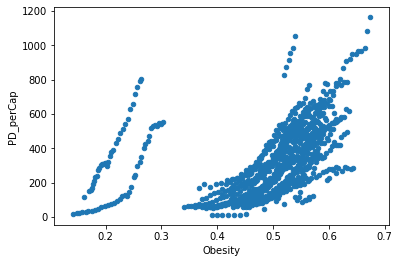

In [42]:
df3.plot.scatter(x ='Obesity', y = 'PD_perCap')

In [43]:
#result = sm.ols(formula="PD_perCap ~ Obesity", data=df3).fit()
#print(result.params)
#print(result.summary())

,Year,Obesity
Year,1.000000,0.999966
Obesity,0.999966,1.000000


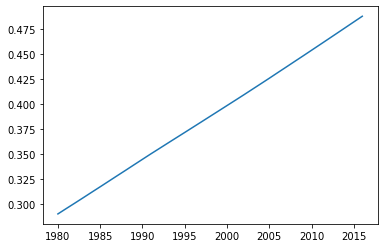

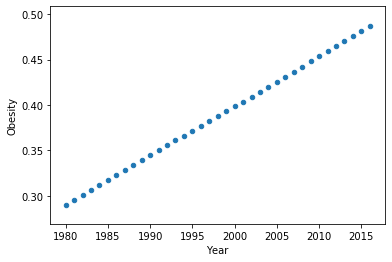

In [44]:
#mean obesity per year, we can see that the level of observed rise over the last 40 years ´.
test = df1.groupby('Year', as_index = False).agg({'Obesity': 'mean'})
test
plt.plot(test.Year, test.Obesity)
test.plot.scatter(x = 'Year', y = 'Obesity')
test.corr() 

In [45]:
test.corr()
result = sm.ols(formula="Obesity ~ Year", data=test).fit()
print(result.params)
print(result.summary())

AttributeError: module 'statsmodels.api' has no attribute 'ols'

# Some random queries and tests

#df3['Obesity'].hist(bins=100)
#df3['Country_Code'].hist()
plt.scatter(df3.Obesity, df3.PD_perCap)

df3.corr() 
#df3

df3.mean()

test = df3[df3['Country_Code'] != 'USA']
#plt.plot(test.Year, test.PD_perCap)
#plt.plot(df3.Year, df3.Obesity)
plt.plot(test.Year, test.PD_total)
#df3['Obesity'][df3['Country_Code'] == 'USD'].hist()

df3.groupby(['Country_Code'], as_index=False).agg({'Obesity': "mean", 'PD_perCap': 'mean'})

test = df3.groupby('Year', as_index = False).agg({'Obesity': 'mean'})
test

df3[df3['Year'] == 2016].shape
#test = df3[df3['Country_Code'] == 'KOR']
#test
#df3.groupby('Year').sum()

plt.plot(test.Year, test.Obesity)

testdf3 = df3.groupby('Year', as_index = False).agg({'Obesity': 'mean', 'PD_perCap': 'mean'})
testdf3
#plt.scatter(df3.Obesity, df3.PD_perCap)
#plt.scatter(testdf1.Year, testdf1.Obesity)
#scatter(test)

X = pd.DataFrame(testdf3['Obesity'])
y = pd.DataFrame(testdf3['PD_perCap'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

result = sm.ols(formula="PD_perCap ~ Obesity", data=testdf3).fit()
print(result.params)
print(result.summary())

plt.scatter(df3.Obesity, df3.PD_perCap)

In [ ]:
#Regression groupby Country

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params
    #return result.summary()
df3.groupby('Country_Code').apply(regress, 'PD_perCap', ['Obesity'] )
#print(result.summary())

In [ ]:
#df3['Obesity'] = df3['Obesity'] * 100
df3
#df3.plot.bar(x = 'Year', y = 'PD_perCap')
test2 = df3.groupby('Year', as_index = False).agg({'Obesity': 'mean', 'PD_perCap': 'mean'})
test2.plot.scatter(x = 'Obesity', y = 'PD_perCap')

In [ ]:
test3 = df3.groupby(['Country_Code'], as_index=False).agg({'Obesity': "count"}).sort_values('Obesity')
#test3 = test3.sort_values('Obesity')
test3
pl = test3.plot.bar(y='Obesity',x='Country_Code')
fig = pl.get_figure()